In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("darkgrid")

In [4]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [5]:
Time_Series_1 = pd.read_csv('Data/Time_Series_1.csv')

In [11]:
Time_Series_1

,CODARTIC,CODIREGG,IMPLINEA,IMPVENTA,CODTAVEN,QCANTDEC,NUMTARJE
0,10254201003449,1,59.99,59.99,2022-06-21001069602336387,1.0,6.008330e+18
1,10234141001560,1,12.72,12.72,2021-08-03001002100821700,1.0,NaN
2,10865290000019,4,11.20,11.20,2022-08-21001009006714129,1.0,6.008330e+18
3,10004136025419,1,48.97,48.97,2022-07-09001003602372694,1.0,NaN
4,10073131011804,1,22.95,22.95,2022-05-14001091203649080,1.0,6.008330e+18
...,...,...,...,...,...,...,...
704350,10271412016641,1,18.90,18.90,2022-02-10001003601776985,1.0,NaN
704351,10411524000184,2,-29.99,-29.99,2022-06-02001009803937030,-1.0,NaN
704352,10092532091505,1,75.00,75.00,2022-05-19001003602477163,1.0,6.008330e+18
704353,10805731000015,2,-12.59,-10.70,2022-02-17001009008963198,-1.0,6.008330e+18


In [6]:
Time_Series_1 = Time_Series_1.rename(columns={'IMPVENTA' : 'Ventas'})

In [7]:
Time_Series_1['Fecha'] = Time_Series_1['CODTAVEN'].str[0:10]

In [8]:
Time_Series_1['Fecha'] = pd.to_datetime(Time_Series_1['Fecha'])

Time_Series_1['Dia'] = Time_Series_1['Fecha'].dt.day

Time_Series_1['Semana'] = Time_Series_1['Fecha'].dt.week

Time_Series_1['Mes'] = Time_Series_1['Fecha'].dt.month

Time_Series_1['Trimestre'] = Time_Series_1['Fecha'].dt.quarter

Time_Series_1['Año'] = Time_Series_1['Fecha'].dt.year

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16440\2992499271.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Time_Series_1['Semana'] = Time_Series_1['Fecha'].dt.week


In [9]:
Time_Series_1 = Time_Series_1.loc[: , ['Fecha', 'Dia', 'Semana', 'Mes', 'Trimestre', 'Año', 'Ventas']]

In [9]:
Time_Series_1

,Fecha,Dia,Semana,Mes,Trimestre,Año,Ventas
0,2022-06-21,21,25,6,2,2022,59.99
1,2021-08-03,3,31,8,3,2021,12.72
2,2022-08-21,21,33,8,3,2022,11.20
3,2022-07-09,9,27,7,3,2022,48.97
4,2022-05-14,14,19,5,2,2022,22.95
...,...,...,...,...,...,...,...
704350,2022-02-10,10,6,2,1,2022,18.90
704351,2022-06-02,2,22,6,2,2022,-29.99
704352,2022-05-19,19,20,5,2,2022,75.00
704353,2022-02-17,17,7,2,1,2022,-10.70


## Gráfico de box-plots por mes

In [17]:
Time_Series_1_copy = Time_Series_1.copy()

In [18]:
Time_Series_1_copy['Año'] = Time_Series_1_copy['Año'].astype('string')
Time_Series_1_copy['Mes'] = Time_Series_1_copy['Mes'].astype('string')

Time_Series_1_copy['Mes-Año'] = Time_Series_1_copy[['Mes', 'Año']].agg('-'.join, axis=1)

In [19]:
Time_Series_1_copy

,Fecha,Dia,Semana,Mes,Trimestre,Año,Ventas,Mes-Año
0,2022-06-21,21,25,6,2,2022,59.99,6-2022
1,2021-08-03,3,31,8,3,2021,12.72,8-2021
2,2022-08-21,21,33,8,3,2022,11.20,8-2022
3,2022-07-09,9,27,7,3,2022,48.97,7-2022
4,2022-05-14,14,19,5,2,2022,22.95,5-2022
...,...,...,...,...,...,...,...,...
704350,2022-02-10,10,6,2,1,2022,18.90,2-2022
704351,2022-06-02,2,22,6,2,2022,-29.99,6-2022
704352,2022-05-19,19,20,5,2,2022,75.00,5-2022
704353,2022-02-17,17,7,2,1,2022,-10.70,2-2022


In [20]:
from datetime import datetime

# Definir el array de fechas:

Mes_Año = Time_Series_1_copy['Mes-Año'].unique()

# Convertir las fechas a objetos datetime y almacenarlos en una nueva lista:

Mes_Año_dt = [datetime.strptime(f, '%m-%Y') for f in Mes_Año]

# Ordenar la lista de fechas datetime:

Mes_Año_dt_sorted = sorted(Mes_Año_dt)

# Convertir los objetos datetime ordenados de nuevo a una lista de cadenas con formato "mes-año":

Mes_Año_dt_sorted = [datetime.strftime(f, '%m-%Y') for f in Mes_Año_dt_sorted]

# Eliminar los ceros iniciales:

Mes_Año_dt_sorted_sin_ceros = [x.lstrip('0')  if x.startswith('0')  else x   for x in Mes_Año_dt_sorted]

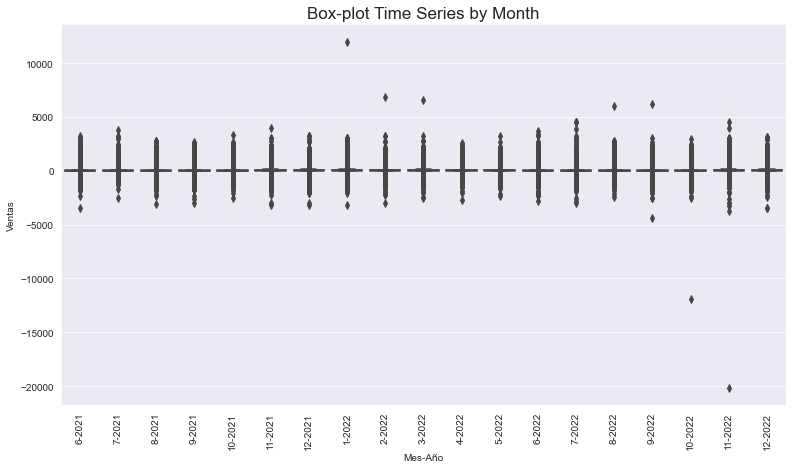

In [21]:
fig, ax = plt.subplots(figsize=(13,7))

p1 = sns.boxplot(x="Mes-Año", y="Ventas", data=Time_Series_1_copy, order=Mes_Año_dt_sorted_sin_ceros, showfliers=True)
 
plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Box-plot Time Series by Month",  fontsize = 17)

fig.savefig('pbox1.jpg', format='jpg', dpi=500)

plt.show()

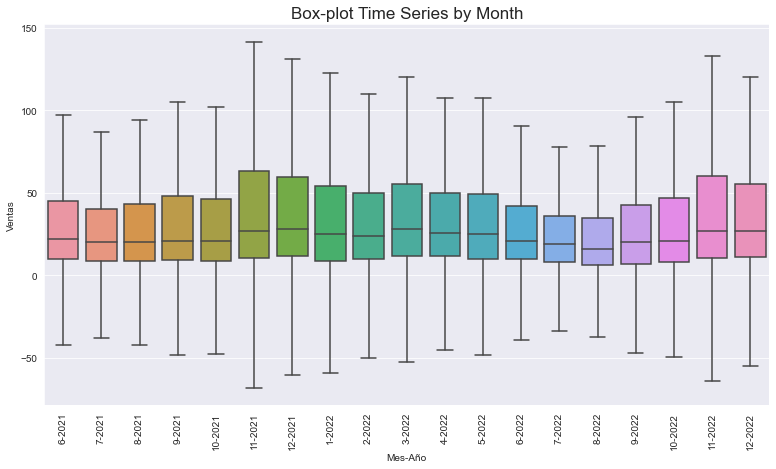

In [22]:
fig, ax = plt.subplots(figsize=(13,7))

p1 = sns.boxplot(x="Mes-Año", y="Ventas", data=Time_Series_1_copy, order=Mes_Año_dt_sorted_sin_ceros, showfliers=False)
 
plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Box-plot Time Series by Month",  fontsize = 17)

fig.savefig('pbox2.jpg', format='jpg', dpi=500)

plt.show()

## Monthly Time Series

In [23]:
Time_Series_1

,Fecha,Dia,Semana,Mes,Trimestre,Año,Ventas
0,2022-06-21,21,25,6,2,2022,59.99
1,2021-08-03,3,31,8,3,2021,12.72
2,2022-08-21,21,33,8,3,2022,11.20
3,2022-07-09,9,27,7,3,2022,48.97
4,2022-05-14,14,19,5,2,2022,22.95
...,...,...,...,...,...,...,...
704350,2022-02-10,10,6,2,1,2022,18.90
704351,2022-06-02,2,22,6,2,2022,-29.99
704352,2022-05-19,19,20,5,2,2022,75.00
704353,2022-02-17,17,7,2,1,2022,-10.70


In [24]:
Monthly_Time_Series_1 = Time_Series_1.groupby(['Año', 'Mes'])['Ventas'].sum().reset_index(drop=False)

In [25]:
Monthly_Time_Series_1

,Año,Mes,Ventas
0,2021,6,992891.50
1,2021,7,982142.75
2,2021,8,885289.16
3,2021,9,878563.14
4,2021,10,923552.45
5,2021,11,1527486.61
6,2021,12,1438722.72
7,2022,1,1910816.46
8,2022,2,1317501.34
9,2022,3,1524652.47


Cambiamos las columnas Año y Mes a formato String y creamos la columna Mes-Año

In [26]:
Monthly_Time_Series_1['Año'] = Monthly_Time_Series_1['Año'].astype('string')
Monthly_Time_Series_1['Mes'] = Monthly_Time_Series_1['Mes'].astype('string')

Monthly_Time_Series_1['Mes-Año'] = Monthly_Time_Series_1[['Mes', 'Año']].agg('-'.join, axis=1)

In [27]:
Monthly_Time_Series_1

,Año,Mes,Ventas,Mes-Año
0,2021,6,992891.50,6-2021
1,2021,7,982142.75,7-2021
2,2021,8,885289.16,8-2021
3,2021,9,878563.14,9-2021
4,2021,10,923552.45,10-2021
5,2021,11,1527486.61,11-2021
6,2021,12,1438722.72,12-2021
7,2022,1,1910816.46,1-2022
8,2022,2,1317501.34,2-2022
9,2022,3,1524652.47,3-2022


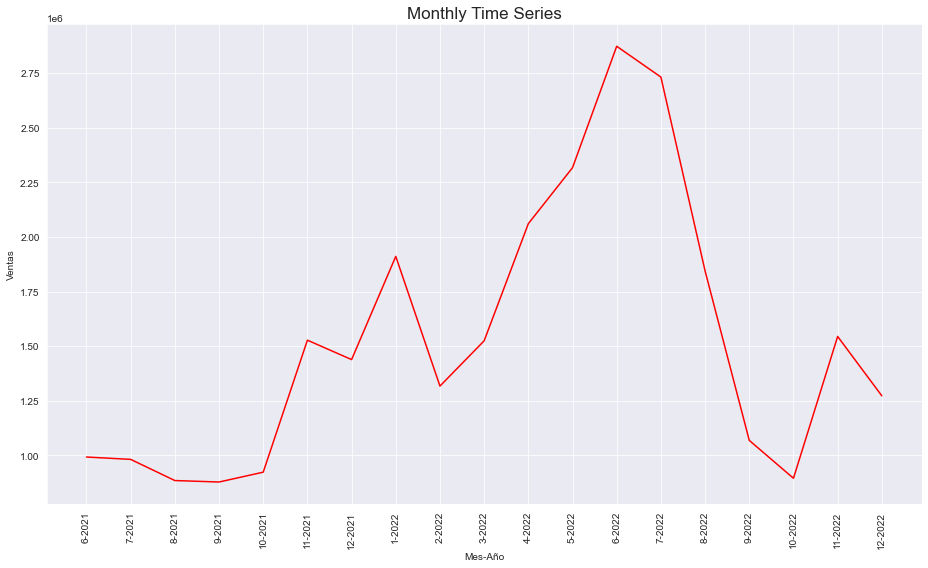

In [28]:
fig, ax = plt.subplots(figsize=(13,8))

p=sns.lineplot(x="Mes-Año", y="Ventas", data=Monthly_Time_Series_1 , color='red')

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Monthly Time Series",  fontsize = 17)

plt.tight_layout()

fig.savefig('p1.jpg', format='jpg', dpi=500)

plt.show()

## Daily Time Series

In [29]:
Daily_Time_Series_1 = Time_Series_1.groupby(['Año', 'Mes','Dia'])['Ventas'].sum().reset_index(drop=False)

In [30]:
Daily_Time_Series_1

,Año,Mes,Dia,Ventas
0,2021,6,1,26423.78
1,2021,6,2,18752.01
2,2021,6,3,22812.84
3,2021,6,4,107889.11
4,2021,6,5,136714.44
...,...,...,...,...
574,2022,12,27,64542.49
575,2022,12,28,59913.84
576,2022,12,29,53815.43
577,2022,12,30,52695.32


In [31]:
Daily_Time_Series_1['Año'] = Daily_Time_Series_1['Año'].astype('string')
Daily_Time_Series_1['Mes'] = Daily_Time_Series_1['Mes'].astype('string')
Daily_Time_Series_1['Dia'] = Daily_Time_Series_1['Dia'].astype('string')

Daily_Time_Series_1['Dia-Mes-Año'] = Daily_Time_Series_1[['Dia', 'Mes', 'Año']].agg('-'.join, axis=1)

In [32]:
Daily_Time_Series_1

,Año,Mes,Dia,Ventas,Dia-Mes-Año
0,2021,6,1,26423.78,1-6-2021
1,2021,6,2,18752.01,2-6-2021
2,2021,6,3,22812.84,3-6-2021
3,2021,6,4,107889.11,4-6-2021
4,2021,6,5,136714.44,5-6-2021
...,...,...,...,...,...
574,2022,12,27,64542.49,27-12-2022
575,2022,12,28,59913.84,28-12-2022
576,2022,12,29,53815.43,29-12-2022
577,2022,12,30,52695.32,30-12-2022


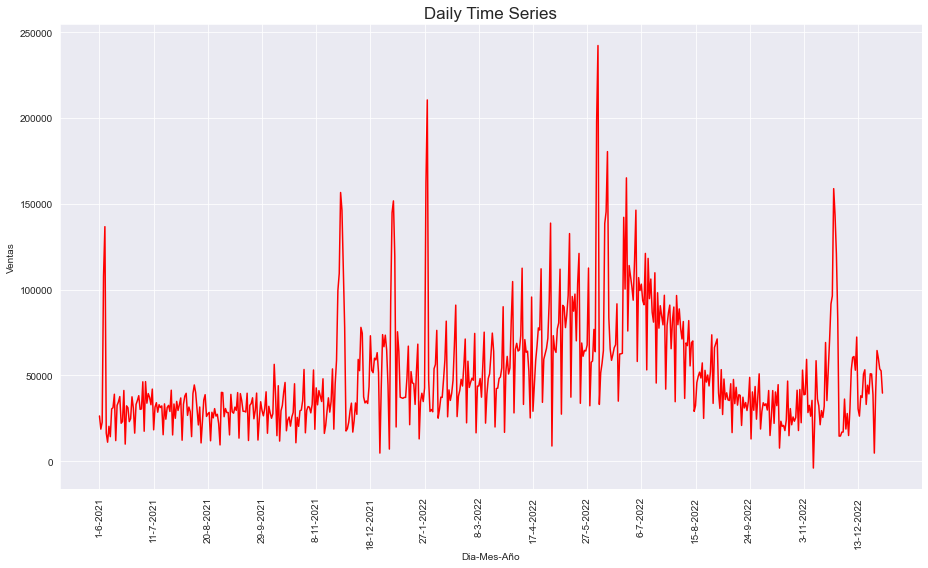

In [33]:
fig, ax = plt.subplots(figsize=(13,8))

p=sns.lineplot(x="Dia-Mes-Año", y="Ventas", data=Daily_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Daily_Time_Series_1) , 40))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Daily Time Series", fontsize = 17)

plt.tight_layout()


fig.savefig('p2.jpg', format='jpg', dpi=500)

plt.show()

## Weekly Time Series

In [10]:
Weekly_Time_Series_1 = Time_Series_1.groupby(['Año', 'Mes','Semana'])['Ventas'].sum().reset_index(drop=False)

In [11]:
Weekly_Time_Series_1

,Año,Mes,Semana,Ventas
0,2021,6,22,329029.82
1,2021,6,23,158833.59
2,2021,6,24,201568.21
3,2021,6,25,196610.74
4,2021,6,26,106849.14
...,...,...,...,...
94,2022,12,48,89144.45
95,2022,12,49,301484.19
96,2022,12,50,308829.59
97,2022,12,51,262326.49


In [12]:
Weekly_Time_Series_1['Año'] = Weekly_Time_Series_1['Año'].astype('string')
Weekly_Time_Series_1['Mes'] = Weekly_Time_Series_1['Mes'].astype('string')
Weekly_Time_Series_1['Semana'] = Weekly_Time_Series_1['Semana'].astype('string')

Weekly_Time_Series_1['Semana-Mes-Año'] = Weekly_Time_Series_1[['Semana', 'Mes', 'Año']].agg('-'.join, axis=1)

In [37]:
Weekly_Time_Series_1

,Año,Mes,Semana,Ventas,Semana-Mes-Año
0,2021,6,22,329029.82,22-6-2021
1,2021,6,23,158833.59,23-6-2021
2,2021,6,24,201568.21,24-6-2021
3,2021,6,25,196610.74,25-6-2021
4,2021,6,26,106849.14,26-6-2021
...,...,...,...,...,...
94,2022,12,48,89144.45,48-12-2022
95,2022,12,49,301484.19,49-12-2022
96,2022,12,50,308829.59,50-12-2022
97,2022,12,51,262326.49,51-12-2022


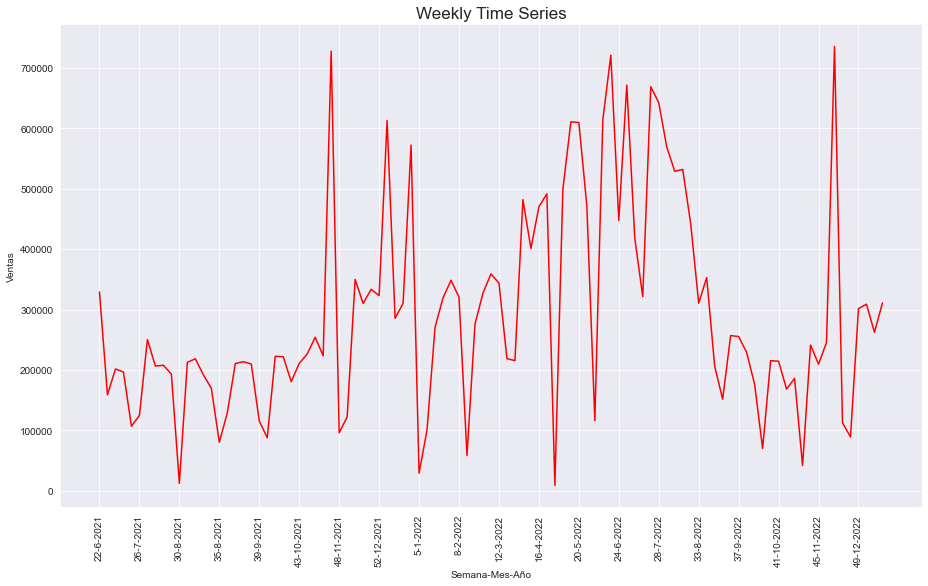

In [38]:
fig, ax = plt.subplots(figsize=(13,8))

p=sns.lineplot(x="Semana-Mes-Año", y="Ventas", data=Weekly_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.title("Weekly Time Series",  fontsize = 17)

fig.savefig('p3.jpg', format='jpg', dpi=500)

plt.show()

## Quarter Time Series

In [39]:
Quarter_Time_Series_1 = Time_Series_1.groupby(['Año', 'Trimestre'])['Ventas'].sum().reset_index(drop=False)

In [40]:
Quarter_Time_Series_1

,Año,Trimestre,Ventas
0,2021,2,992891.50
1,2021,3,2745995.05
2,2021,4,3889761.78
3,2022,1,4752970.27
4,2022,2,7249462.41
5,2022,3,5644448.99
6,2022,4,3713061.59


In [41]:
Quarter_Time_Series_1['Año'] = Quarter_Time_Series_1['Año'].astype('string')
Quarter_Time_Series_1['Trimestre'] = Quarter_Time_Series_1['Trimestre'].astype('string')

Quarter_Time_Series_1['Trimestre-Año'] = Quarter_Time_Series_1[['Trimestre', 'Año']].agg('-'.join, axis=1)

In [42]:
Quarter_Time_Series_1

,Año,Trimestre,Ventas,Trimestre-Año
0,2021,2,992891.50,2-2021
1,2021,3,2745995.05,3-2021
2,2021,4,3889761.78,4-2021
3,2022,1,4752970.27,1-2022
4,2022,2,7249462.41,2-2022
5,2022,3,5644448.99,3-2022
6,2022,4,3713061.59,4-2022


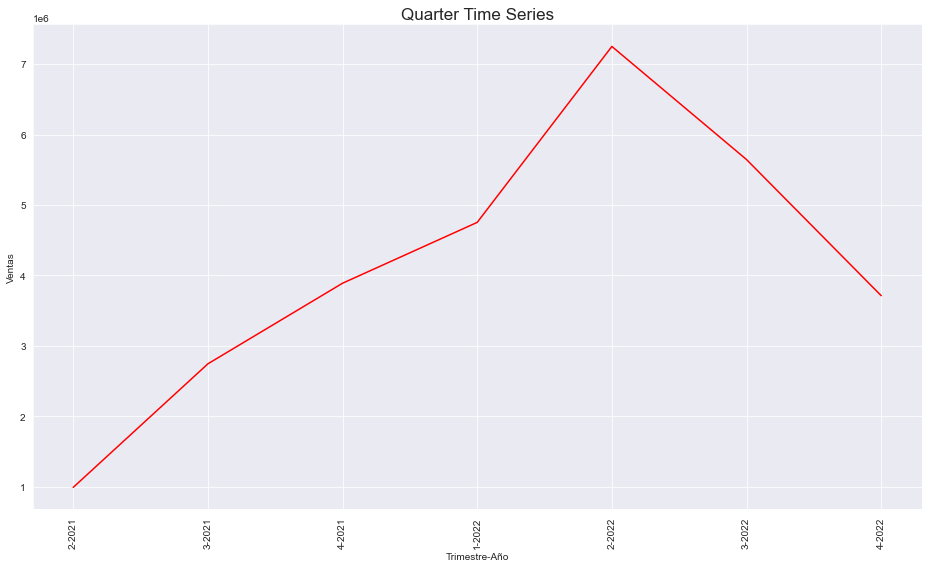

In [43]:
fig, ax = plt.subplots(figsize=(13,8))

p=sns.lineplot(x="Trimestre-Año", y="Ventas", data=Quarter_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Quarter_Time_Series_1) , 1))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Quarter Time Series",  fontsize = 17)

plt.tight_layout()

fig.savefig('p4.jpg', format='jpg', dpi=500)

plt.show()

## Yearly Time Series

In [45]:
Time_Series_2 = pd.read_csv('Data/Time_Series_2.csv')

In [46]:
Time_Series_2['Fecha'] = pd.to_datetime(Time_Series_2['Fecha'])

Time_Series_2['Dia'] = Time_Series_2['Fecha'].dt.day

Time_Series_2['Semana'] = Time_Series_2['Fecha'].dt.week

Time_Series_2['Mes'] = Time_Series_2['Fecha'].dt.month

Time_Series_2['Trimestre'] = Time_Series_2['Fecha'].dt.quarter

Time_Series_2['Año'] = Time_Series_2['Fecha'].dt.year

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9488\590937400.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Time_Series_2['Semana'] = Time_Series_2['Fecha'].dt.week


In [47]:
Time_Series_2.loc[:,['Importe', 'Fecha', 'Dia', 'Semana', 'Mes', 'Trimestre', 'Año']]

,Importe,Fecha,Dia,Semana,Mes,Trimestre,Año
0,120.0,2022-11-12,12,45,11,4,2022
1,25.0,2022-11-08,8,45,11,4,2022
2,25.0,2022-11-08,8,45,11,4,2022
3,57.0,2022-11-07,7,45,11,4,2022
4,245.0,2022-11-05,5,44,11,4,2022
...,...,...,...,...,...,...,...
1017,270.0,2018-09-17,17,38,9,3,2018
1018,375.0,2018-07-03,3,27,7,3,2018
1019,45.0,2018-06-21,21,25,6,2,2018
1020,365.0,2018-06-20,20,25,6,2,2018


In [48]:
Yearly_Time_Series_2 = Time_Series_2.groupby(['Año'])['Importe'].sum().reset_index(drop=False)

In [49]:
Yearly_Time_Series_2

,Año,Importe
0,2018,20584.60
1,2019,52704.27
2,2020,81690.09
3,2021,97683.53
4,2022,95286.31


In [50]:
Yearly_Time_Series_2['Año'] = Yearly_Time_Series_2['Año'].astype('string')

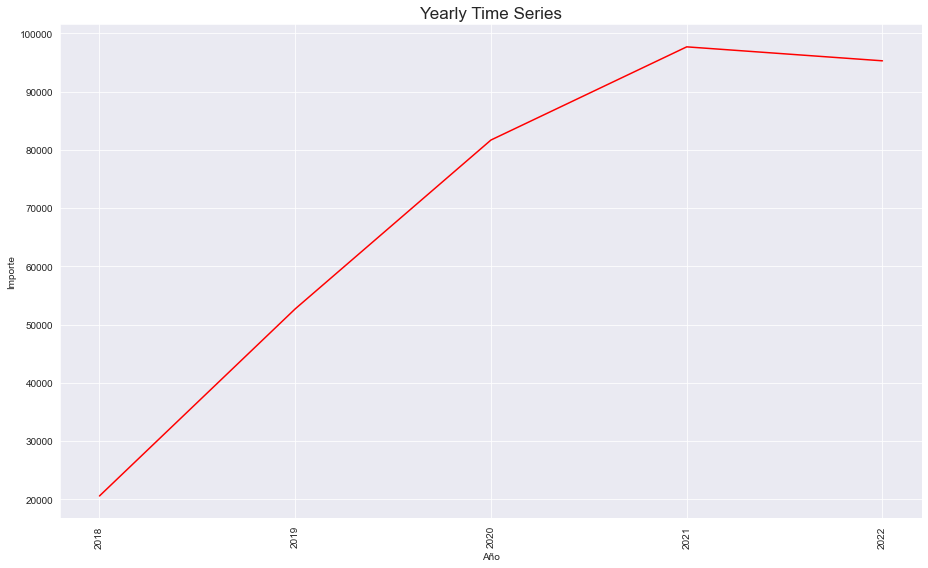

In [51]:
fig, ax = plt.subplots(figsize=(13,8))

p=sns.lineplot(x="Año", y="Importe", data=Yearly_Time_Series_2 , color='red')

p.set_xticks(np.arange(0 , len(Yearly_Time_Series_2) , 1))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Yearly Time Series",  fontsize = 17)

plt.tight_layout()

fig.savefig('p5.jpg', format='jpg', dpi=500)

plt.show()

## Time Series Decomposition

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [53]:
Weekly_Time_Series_1

,Año,Mes,Semana,Ventas,Semana-Mes-Año
0,2021,6,22,329029.82,22-6-2021
1,2021,6,23,158833.59,23-6-2021
2,2021,6,24,201568.21,24-6-2021
3,2021,6,25,196610.74,25-6-2021
4,2021,6,26,106849.14,26-6-2021
...,...,...,...,...,...
94,2022,12,48,89144.45,48-12-2022
95,2022,12,49,301484.19,49-12-2022
96,2022,12,50,308829.59,50-12-2022
97,2022,12,51,262326.49,51-12-2022


In [57]:
advanced_decomposition = STL(Weekly_Time_Series_1.Ventas, period=4).fit()

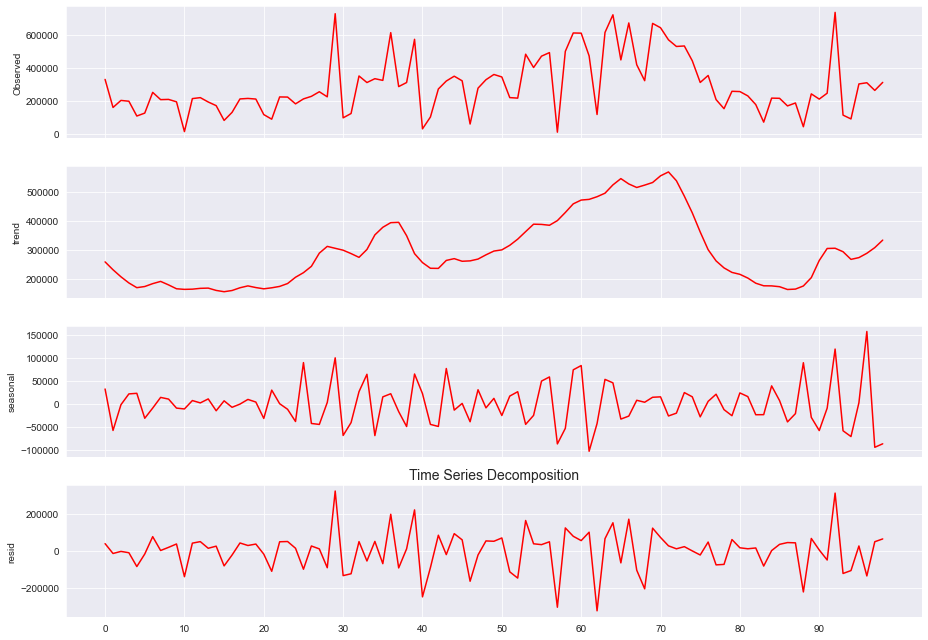

In [58]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(13,9))

plt.title("Time Series Decomposition",  fontsize = 14)

p1=sns.lineplot(advanced_decomposition.observed, color='red', ax=axs[0])
p2=sns.lineplot(advanced_decomposition.trend, color='red', ax=axs[1])
p3=sns.lineplot(advanced_decomposition.seasonal, color='red', ax=axs[2])
p4=sns.lineplot(advanced_decomposition.resid, color='red', ax=axs[3])

p1.set_ylabel('Observed')
p2.set_ylabel('trend')
p3.set_ylabel('seasonal')
p4.set_ylabel('resid')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 10))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.tight_layout()

fig.savefig('p6.jpg', format='jpg', dpi=500)

plt.show()

The following graph has superimposed the observed series and the trend:

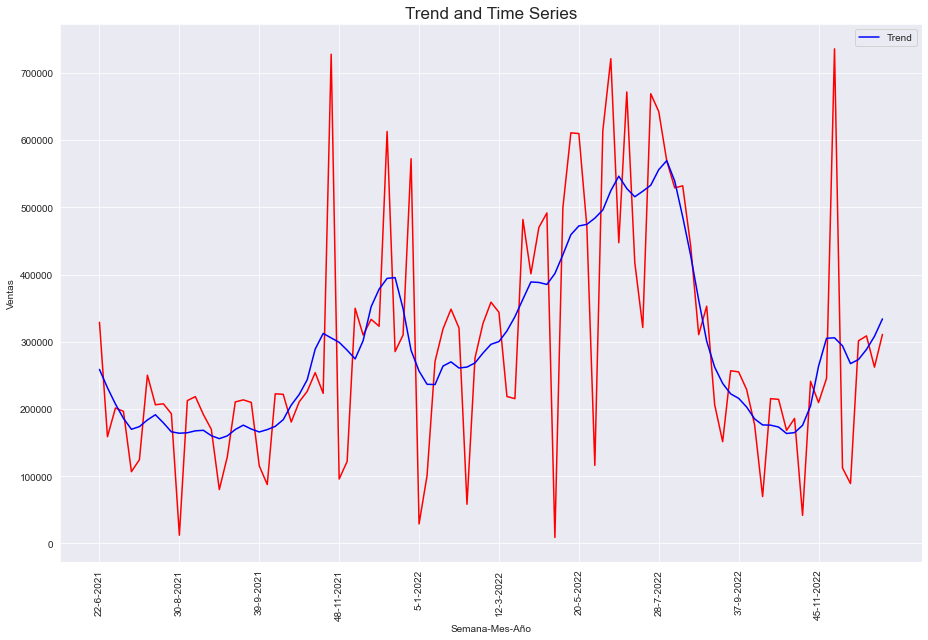

In [59]:
fig, ax = plt.subplots(figsize=(13,9))

p1=sns.lineplot(x="Semana-Mes-Año", y="Ventas", data=Weekly_Time_Series_1 , color='red')
p2=sns.lineplot(advanced_decomposition.trend, color='blue', linestyle='-', label='Trend')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 10))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Trend and Time Series",  fontsize = 17)

plt.tight_layout()

fig.savefig('p7.jpg', format='jpg', dpi=500)

plt.show()

# Forecasting  time series 

## Naive models

### Historical mean model

In [43]:
class historical_mean_model:

    def __init__(self):

        pass
        
    def fit(self, train_time_series, y=None):

        self.train_time_series = train_time_series

        self.n = len(train_time_series) - 1 
        
        # restamos 1 porque python empieza a contar en cero y nos interesa la posicion del ultimo elemento de la muestra. 
        # La cual no es len() sino len()-1

        return self

    
    def predict(self, t):

        Y_historical_mean = np.mean( self.train_time_series )

        Y_predict_t = Y_historical_mean      
            
        return Y_predict_t          

In [44]:
historical_mean_model_init = historical_mean_model()

In [45]:
historical_mean_model_init.fit(train_time_series=Weekly_Time_Series_1['IMPVENTA'])

In [46]:
historical_mean_model_init.predict(t=10)

292814.0564646464

In [47]:
historical_mean_model_init.predict(t=100)

292814.0564646464

### Last h periods mean model

In [48]:
class last_h_periods_model:

    def __init__(self, h, flexible=False):

        self.h = h

        self.flexible = flexible

        
    def fit(self, train_time_series, y=None):

        self.train_time_series = train_time_series

        self.n = len(train_time_series) - 1 
        
        # restamos 1 porque python empieza a contar en cero y nos interesa la posicion del ultimo elemento de la muestra. 
        # La cual no es len() sino len()-1

        self.flexible = self.flexible 

        return self

    
    def predict(self, t):

        Y_last_h_periods = []

        t = t-1 
        
        # paso necesario para evitar problemas por la definicion de los indices en Python (se empieza a contar en cero 0) 
        # el parametro t introducido por el usiario alude al periodo que se quiere predecir, pero la funcion debe considerar la
        # posicion en el indice del data-set de dicho periodo, la cual es t-1.

        if self.flexible == False :

            for j in range(0, self.h):
        
                Y_last_h_periods.append(self.train_time_series.iloc[self.n-j])
       
       
        elif self.flexible ==True :
            
            if t <= self.n :

                for j in range(1, self.h + 1):
        
                    Y_last_h_periods.append(self.train_time_series.iloc[t-j])
       
            elif t > self.n :
       
                for j in range(1, self.h + 1):
                                           
                    if t - j <= self.n :
                    
                        Y_last_h_periods.append(self.train_time_series.iloc[t-j])
            
                    elif t - j > self.n :
                 
                        Y_pred = self.predict(t=t-j)
                        
                        Y_last_h_periods.append(Y_pred)
                
        
        Y_predict_t = np.mean(Y_last_h_periods)      
            
        return Y_predict_t          

In [49]:
LastHPeriodsNotFlex_init = last_h_periods_model(h=3, flexible=False)

In [50]:
LastHPeriodsNotFlex_init.fit(train_time_series=Weekly_Time_Series_1['IMPVENTA'])

In [51]:
LastHPeriodsNotFlex_init.predict(t=10)

294062.01666666666

In [52]:
LastHPeriodsNotFlex_init.predict(t=99+1)

294062.01666666666

In [53]:
LastHPeriodsNotFlex_init.predict(t=99+2)

294062.01666666666

In [54]:
Weekly_Time_Series_1.iloc[[98,97,96],:]['IMPVENTA'].mean()

294062.01666666666

In [55]:
LastHPeriodsNotFlex_init = last_h_periods_model(h=7, flexible=False)

In [56]:
LastHPeriodsNotFlex_init.fit(train_time_series=Weekly_Time_Series_1['IMPVENTA'])

In [57]:
LastHPeriodsNotFlex_init.predict(t=10)

302997.38285714283

In [58]:
LastHPeriodsFlex_init = last_h_periods_model(h=3, flexible=True)

In [59]:
LastHPeriodsFlex_init.fit(train_time_series=Weekly_Time_Series_1['IMPVENTA'])

In [60]:
LastHPeriodsFlex_init.predict(t=99+1)

294062.01666666666

In [61]:
LastHPeriodsFlex_init.predict(t=99+2)

288078.85000000003

In [62]:
LastHPeriodsFlex_init.predict(t=10) # valor predicho de Y en t=10

221503.37999999998

Notese que el valor de la serie en t=10 se corresponde en Pythonb con Weekly_Time_Series_1.iloc[t-1=9]['IMPVENTA']
Por ello el valor de la serie en los anteriores tres periodos a t=10 son Weekly_Time_Series_1.iloc[[8,7,6],:]['IMPVENTA']

La funcion anterior tiene esta cuestion en cuenta. 

In [63]:
Weekly_Time_Series_1.iloc[9]['IMPVENTA'] # valor real de Y en t=10

192997.13

In [64]:
Weekly_Time_Series_1.iloc[[8,7,6],:]['IMPVENTA'].mean()

221503.37999999998

In [65]:
LastHPeriodsFlex_init = last_h_periods_model(h=7, flexible=True)

In [66]:
LastHPeriodsFlex_init.fit(train_time_series=Weekly_Time_Series_1['IMPVENTA'])

In [67]:
LastHPeriodsFlex_init.predict(t=99+1)

302997.38285714283

In [68]:
LastHPeriodsFlex_init.predict(t=99+2)

239828.59918367348

# lag-h model

In [69]:
class lag_h_model:

    def __init__(self, h):

        self.h = h

        
    def fit(self, train_time_series, y=None):

        self.train_time_series = train_time_series

        self.n = len(self.train_time_series) - 1

        return self

    
    def predict(self, t):

        t = t-1 

        if t <= self.n + self.h :

            Y_predict_t = self.train_time_series.iloc[t- self.h]  
       
        elif t > self.n + self.h :

            Y_predict_t = self.predict(t = t - self.h)
       
        
        return Y_predict_t          

In [70]:
lag_h_model_init = lag_h_model(h=10)

In [71]:
lag_h_model_init.fit(train_time_series=Weekly_Time_Series_1['IMPVENTA'])

In [72]:
lag_h_model_init.predict(t=95)

215449.91

In [73]:
Weekly_Time_Series_1['IMPVENTA'].iloc[(95-1)-10]

215449.91

In [74]:
lag_h_model_init.predict(t=110)

41834.72

## Statistical Models

### AR(p) en python

In [13]:
from statsmodels.tsa.arima.model import ARIMA

#### AR(1)

In [14]:
p=1

AR_1_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(p,0,0))

AR_1_model = AR_1_model.fit()

In [15]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_AR_1 = AR_1_model.predict(start= n + 1, end= n + k)

In [16]:
Y_predict_AR_1

99     299603.813264
100    295344.854457
101    293757.380160
102    293165.668722
103    292945.115591
Name: predicted_mean, dtype: float64

#### AR(2)

In [19]:
p=2

AR_2_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(p,0,0))

AR_2_model = AR_2_model.fit()

In [20]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_AR_2 = AR_2_model.predict(start= n + 1, end= n + k)

In [21]:
Y_predict_AR_2

99     295235.294447
100    295733.738232
101    294054.681878
102    293561.810618
103    293204.182323
Name: predicted_mean, dtype: float64

#### AR(3)

In [23]:
p=3

AR_3_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(p,0,0))

AR_3_model = AR_3_model.fit()

In [24]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_AR_3 = AR_3_model.predict(start= n + 1, end= n + k)

In [25]:
Y_predict_AR_3

99     302981.143897
100    286070.378339
101    296833.462374
102    297198.266674
103    291939.312891
Name: predicted_mean, dtype: float64

## MA(q) en python

#### MA(1)

In [26]:
q=1

MA_1_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(0,0,q))

MA_1_model = MA_1_model.fit()

In [27]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_MA_1 = MA_1_model.predict(start= n + 1, end= n + k)

In [28]:
Y_predict_MA_1

99     304567.381908
100    292814.056465
101    292814.056465
102    292814.056465
103    292814.056465
Name: predicted_mean, dtype: float64

#### MA(2)

In [29]:
q=2

MA_2_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(0,0,q))

MA_2_model = MA_2_model.fit()

In [30]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_MA_2 = MA_2_model.predict(start= n + 1, end= n + k)

In [31]:
Y_predict_MA_2

99     306276.157127
100    291985.875348
101    292814.056465
102    292814.056465
103    292814.056465
Name: predicted_mean, dtype: float64

### MA(3)

In [32]:
q=3

MA_3_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(0,0,q))

MA_3_model = MA_3_model.fit()

In [33]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_MA_3 = MA_3_model.predict(start= n + 1, end= n + k)

In [34]:
Y_predict_MA_3

99     341646.406641
100    280300.811603
101    305512.286158
102    292814.056465
103    292814.056465
Name: predicted_mean, dtype: float64

## ARMA(p,q) in python

#### ARMA(1,1)

In [35]:
p=1 ; q=1

ARMA_11_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(p,0,q))

ARMA_11_model = ARMA_11_model.fit()

In [36]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_ARMA_11 = ARMA_11_model.predict(start= n + 1, end= n + k)

In [37]:
Y_predict_ARMA_11 # future predictions

99     281493.306849
100    282319.911105
101    283086.159411
102    283796.458762
103    284454.894368
Name: predicted_mean, dtype: float64

#### ARMA(1,2)

In [38]:
p=1 ; q=2

ARMA_12_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(p,0,q))

ARMA_12_model = ARMA_12_model.fit()

In [39]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_ARMA_12 = ARMA_12_model.predict(start= n + 1, end= n + k)

In [40]:
Y_predict_ARMA_12

99     281471.356859
100    282289.864424
101    283054.776756
102    283764.094237
103    284421.857578
Name: predicted_mean, dtype: float64

#### ARMA(2,2)

In [41]:
p=2 ; q=2

ARMA_22_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(p,0,q))

ARMA_22_model = ARMA_22_model.fit()

In [42]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_ARMA_22 = ARMA_22_model.predict(start= n + 1, end= n + k)

In [43]:
Y_predict_ARMA_22

99     317299.242336
100    262492.568770
101    299555.823330
102    276082.341643
103    292389.236530
Name: predicted_mean, dtype: float64

#### ARMA(3,1)

In [44]:
p=3 ; q=1

ARMA_31_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(p,0,q))

ARMA_31_model = ARMA_31_model.fit()

In [45]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_ARMA_31 = ARMA_31_model.predict(start= n + 1, end= n + k)

In [46]:
Y_predict_ARMA_31

99     320221.703625
100    278691.405179
101    308935.897576
102    294304.728547
103    291158.768878
Name: predicted_mean, dtype: float64

## ARIMA(p,d,q) in python

#### ARIMA(1,1,1)

In [47]:
p=1 ; d=1 ; q=1

ARIMA_111_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(p,d,q))

ARIMA_111_model = ARIMA_111_model.fit()

In [48]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_ARIMA_111 = ARIMA_111_model.predict(start= n + 1, end= n + k)

In [49]:
Y_predict_ARIMA_111

99     273259.760035
100    273179.332087
101    273179.160824
102    273179.160459
103    273179.160458
Name: predicted_mean, dtype: float64

#### ARIMA(2,1,1)

In [50]:
p=2 ; d=1 ; q=1

ARIMA_211_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(p,d,q))

ARIMA_211_model = ARIMA_211_model.fit()

In [51]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_ARIMA_211 = ARIMA_211_model.predict(start= n + 1, end= n + k)

In [52]:
Y_predict_ARIMA_211

99     279998.670421
100    270863.207051
101    280250.846957
102    281524.260798
103    278868.188664
Name: predicted_mean, dtype: float64

#### ARIMA(2,1,2)

In [53]:
p=2 ; d=1 ; q=2

ARIMA_212_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(p,d,q))

ARIMA_212_model = ARIMA_212_model.fit()

In [54]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_ARIMA_212 = ARIMA_212_model.predict(start= n + 1, end= n + k)

In [55]:
Y_predict_ARIMA_212

99     309788.728253
100    252431.148126
101    296103.546692
102    276930.665112
103    280882.344857
Name: predicted_mean, dtype: float64

#### ARIMA(1,2,1)

In [56]:
p=1 ; d=2 ; q=1

ARIMA_121_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(p,d,q))

ARIMA_121_model = ARIMA_121_model.fit()

In [57]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_ARIMA_121 = ARIMA_121_model.predict(start= n + 1, end= n + k)

In [58]:
Y_predict_ARIMA_121

99     295279.751647
100    303877.609988
101    303277.720894
102    306152.379664
103    307714.490667
Name: predicted_mean, dtype: float64

#### ARIMA(2,2,1)

In [60]:
p=2 ; q=2 ; d=1

ARIMA_221_model = ARIMA(Weekly_Time_Series_1['Ventas'], order=(p,d,q))

ARIMA_221_model = ARIMA_221_model.fit()

In [61]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_ARIMA_221 = ARIMA_221_model.predict(start= n + 1, end= n + k)

In [62]:
Y_predict_ARIMA_221

99     309788.728253
100    252431.148126
101    296103.546692
102    276930.665112
103    280882.344857
Name: predicted_mean, dtype: float64

## ARIMA(p,d,q)x(P,D,Q) = SARIMA in python

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### SARIMA(1,1,1)x(1,1,1) s=52

In [64]:
p=1 ; d=1 ; q=1 ; P=1 ; D=1 ; Q=1 ; s=52

SARIMA_111_111_model = SARIMAX(Weekly_Time_Series_1['Ventas'], order=(p, d, q), seasonal_order=(P, D, Q, s))

SARIMA_111_111_model = SARIMA_111_111_model.fit()

In [66]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_SARIMA_111_111 = SARIMA_111_111_model.predict(start= n + 1, end= n + k)

In [67]:
Y_predict_SARIMA_111_111

99     280462.949921
100    282256.099096
101    283977.932936
102    283144.994397
103    276255.093503
Name: predicted_mean, dtype: float64

### SARIMA(2,1,1)x(0,1,1) s=52

In [68]:
p=2 ; d=1 ; q=1 ; P=0 ; D=1 ; Q=1 ; s=52

SARIMA_111_011_model = SARIMAX(Weekly_Time_Series_1['Ventas'], order=(p, d, q), seasonal_order=(P, D, Q, s))

SARIMA_111_011_model = SARIMA_111_011_model.fit()

In [ ]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_SARIMA_111_011_model = SARIMA_111_011_model.predict(start= n + 1, end= n + k)

In [ ]:
Y_predict_SARIMA_111_011_model

### SARIMA(1,1,0)x(2,1,1) s=52

In [69]:
p=1 ; d=1 ; q=0 ; P=2 ; D=1 ; Q=1 ; s=52

SARIMA_110_211_model = SARIMAX(Weekly_Time_Series_1['Ventas'], order=(p, d, q), seasonal_order=(P, D, Q, s))

SARIMA_110_211_model = SARIMA_110_211_model.fit()

In [ ]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_SARIMA_110_211_model = SARIMA_110_211_model.predict(start= n + 1, end= n + k)

In [ ]:
Y_predict_SARIMA_110_211_model

### SARIMA(1,1,1)x(1,2,0) s=52

In [ ]:
p=1 ; d=1 ; q=1 ; P=1 ; D=2 ; Q=0 ; s=52

SARIMA_111_120_model = SARIMAX(Weekly_Time_Series_1['Ventas'], order=(p, d, q), seasonal_order=(P, D, Q, s))

SARIMA_111_120_model = SARIMA_111_120_model.fit()

In [ ]:
k = 5

n = len(Weekly_Time_Series_1) - 1

Y_predict_SARIMA_111_120_model = SARIMA_111_120_model.predict(start= n + 1, end= n + k)

## Métodos de validacion de series temporales

### Validacion simple

In [70]:
class Time_Series_Simple_Validation:
    
    def __init__(self, time_series, prop_train, model, order=None, seasonal_order=None, h=None):

        self.time_series = time_series
        
        self.prop_train = prop_train
        
        self.model = model
        
        self.order = order

        self.seasonal_order = seasonal_order
        
        self.h = h
        
        self.train_periods = None
        
        self.test_periods = None
        
        self.Y_test_predictions = None
        
        self.Y_test = None
        
        self.MAPE = None
        
        self.ECM = None
        

    def split_train_test(self):
        
        train_size = round(self.prop_train * len(self.time_series))
        
        self.train_periods = range(0, train_size)
        
        self.test_periods = range(train_size + 1, len(self.time_series))


    def fit(self):

        Y_train = self.time_series[self.train_periods]

        Y_test = self.time_series[self.test_periods]

        n_train = len(Y_train)

        n_test = len(Y_test)
        

        if self.model == 'lag-h' and self.h is not None:

            lag_h_model_init = lag_h_model(self.h)

            lag_h_model_init.fit(train_time_series=Y_train)

            self.Y_test_predictions = [lag_h_model_init.predict(t=i+1) for i in self.test_periods]


        elif self.model == 'ARIMA' and self.order is not None:

            arima_model = ARIMA(Y_train, order=self.order)

            arima_model_fit = arima_model.fit()

            self.Y_test_predictions = arima_model_fit.predict(start=n_train + 1, end=n_train + n_test , dynamic=False)


        elif self.model == 'SARIMA' and self.order is not None and self.seasonal_order is not None:

            SARIMA_model = SARIMAX(Y_train, order=self.order, seasonal_order=self.seasonal_order)

            SARIMA_model_fit = SARIMA_model.fit()

            self.Y_test_predictions = SARIMA_model_fit.predict(start=n_train + 1, end=n_train + n_test , dynamic=False)

            
        else:

            raise ValueError('Modelo no soportado')
        

        self.Y_test = Y_test

        self.MAPE = np.mean(np.abs((Y_test - self.Y_test_predictions) / Y_test)) * 100

        self.ECM = np.mean((self.Y_test_predictions - Y_test)**2)


In [71]:
Simple_Validation_AR_2 = Time_Series_Simple_Validation(time_series=Weekly_Time_Series_1['Ventas'], prop_train=0.8, model='ARIMA', order=(2,0,0))
Simple_Validation_AR_2.split_train_test()
Simple_Validation_AR_2.fit()

In [72]:
Simple_Validation_AR_2.MAPE

99.44779396090723

In [73]:
Simple_Validation_AR_2.ECM

25262140510.981133

In [74]:
Simple_Validation_AR_2.Y_test

80    255236.73
81    229025.80
82    176313.72
83     69790.87
84    215449.91
85    214377.50
86    168241.63
87    186040.66
88     41834.72
89    241248.48
90    209620.32
91    245475.82
92    735813.99
93    112353.00
94     89144.45
95    301484.19
96    308829.59
97    262326.49
98    311029.97
Name: Ventas, dtype: float64

In [75]:
Simple_Validation_AR_2.Y_test_predictions

80    263598.212999
81    283528.890654
82    293748.412733
83    299948.969611
84    303470.708522
85    305521.791427
86    306704.869670
87    307389.807625
88    307785.786475
89    308014.836006
90    308147.299444
91    308223.911563
92    308268.219912
93    308293.845791
94    308308.666536
95    308317.238138
96    308322.195536
97    308325.062654
98    308326.720855
Name: predicted_mean, dtype: float64

In [77]:
Simple_Validation_MA_1 = Time_Series_Simple_Validation(time_series=Weekly_Time_Series_1['Ventas'], prop_train=0.8, model='ARIMA', order=(0,0,1))
Simple_Validation_MA_1.split_train_test()
Simple_Validation_MA_1.fit()

In [78]:
Simple_Validation_MA_1.MAPE

102.3568371761956

In [79]:
Simple_Validation_MA_1.ECM

26107578578.361286

In [80]:
Simple_Validation_MA_1.Y_test

80    255236.73
81    229025.80
82    176313.72
83     69790.87
84    215449.91
85    214377.50
86    168241.63
87    186040.66
88     41834.72
89    241248.48
90    209620.32
91    245475.82
92    735813.99
93    112353.00
94     89144.45
95    301484.19
96    308829.59
97    262326.49
98    311029.97
Name: Ventas, dtype: float64

In [81]:
Simple_Validation_MA_1.Y_test_predictions

80    308328.995316
81    308328.995316
82    308328.995316
83    308328.995316
84    308328.995316
85    308328.995316
86    308328.995316
87    308328.995316
88    308328.995316
89    308328.995316
90    308328.995316
91    308328.995316
92    308328.995316
93    308328.995316
94    308328.995316
95    308328.995316
96    308328.995316
97    308328.995316
98    308328.995316
Name: predicted_mean, dtype: float64

In [248]:
Time_Series_Simple_Validation_ARMA_3_2 = Time_Series_Simple_Validation(time_series=Weekly_Time_Series_1['IMPVENTA'], prop_train=0.8, model='ARIMA', order=(3,0,2))
Time_Series_Simple_Validation_ARMA_3_2.split_train_test()
Time_Series_Simple_Validation_ARMA_3_2.fit()

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [249]:
Time_Series_Simple_Validation_ARMA_3_2.MAPE

103.01643953432283

In [250]:
Time_Series_Simple_Validation_ARMA_3_2.Y_test

80    255236.73
81    229025.80
82    176313.72
83     69790.87
84    215449.91
85    214377.50
86    168241.63
87    186040.66
88     41834.72
89    241248.48
90    209620.32
91    245475.82
92    735813.99
93    112353.00
94     89144.45
95    301484.19
96    308829.59
97    262326.49
98    311029.97
Name: IMPVENTA, dtype: float64

In [251]:
Time_Series_Simple_Validation_ARMA_3_2.Y_test_predictions

80    324181.911615
81    292556.381408
82    319635.090480
83    306963.350794
84    309745.623010
85    310479.583595
86    309124.158241
87    309786.540743
88    309466.999342
89    309405.515901
90    309392.107243
91    309291.208952
92    309250.586901
93    309193.143530
94    309140.518960
95    309094.436866
96    309048.229318
97    309006.037280
98    308966.058999
Name: predicted_mean, dtype: float64

In [252]:
Time_Series_Simple_Validation_ARIMA_3_1_2 = Time_Series_Simple_Validation(time_series=Weekly_Time_Series_1['IMPVENTA'], prop_train=0.8, model='ARIMA', order=(3,1,2))
Time_Series_Simple_Validation_ARIMA_3_1_2.split_train_test()
Time_Series_Simple_Validation_ARIMA_3_1_2.fit()

In [253]:
Time_Series_Simple_Validation_ARIMA_3_1_2.MAPE

119.91482791436509

In [226]:
Time_Series_Simple_Validation_ARIMA_3_1_2.Y_test

80    255236.73
81    229025.80
82    176313.72
83     69790.87
84    215449.91
85    214377.50
86    168241.63
87    186040.66
88     41834.72
89    241248.48
90    209620.32
91    245475.82
92    735813.99
93    112353.00
94     89144.45
95    301484.19
96    308829.59
97    262326.49
98    311029.97
Name: IMPVENTA, dtype: float64

In [254]:
Time_Series_Simple_Validation_ARIMA_3_1_2.Y_test_predictions

80    356986.015473
81    317502.770545
82    345656.550231
83    333934.588176
84    337013.005370
85    336846.267444
86    336496.128815
87    336735.158750
88    336640.204737
89    336663.221656
90    336663.088865
91    336659.783124
92    336661.828623
93    336661.061481
94    336661.230623
95    336661.239853
96    336661.209306
97    336661.226669
98    336661.220523
Name: predicted_mean, dtype: float64

In [255]:
Time_Series_Simple_Validation_ARIMA_3_2_2 = Time_Series_Simple_Validation(time_series=Weekly_Time_Series_1['IMPVENTA'], prop_train=0.8, model='ARIMA', order=(3,2,2))
Time_Series_Simple_Validation_ARIMA_3_2_2.split_train_test()
Time_Series_Simple_Validation_ARIMA_3_2_2.fit()

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [256]:
Time_Series_Simple_Validation_ARIMA_3_2_2.MAPE

63.706219125895394

In [257]:
Time_Series_Simple_Validation_ARIMA_3_2_2.Y_test

80    255236.73
81    229025.80
82    176313.72
83     69790.87
84    215449.91
85    214377.50
86    168241.63
87    186040.66
88     41834.72
89    241248.48
90    209620.32
91    245475.82
92    735813.99
93    112353.00
94     89144.45
95    301484.19
96    308829.59
97    262326.49
98    311029.97
Name: IMPVENTA, dtype: float64

In [258]:
Time_Series_Simple_Validation_ARIMA_3_2_2.Y_test_predictions

80    211844.256320
81    200243.960019
82    226986.862688
83    217810.759302
84    216553.364508
85    224667.847489
86    223487.540004
87    224544.865063
88    227927.147972
89    228878.270377
90    230475.623496
91    232635.062607
92    234167.982856
93    235879.822620
94    237730.173307
95    239417.047476
96    241154.654993
97    242925.283236
98    244653.961306
Name: predicted_mean, dtype: float64

In [277]:
Time_Series_Simple_Validation_SARIMA_3_1_2_1_1_1 = Time_Series_Simple_Validation(time_series=Weekly_Time_Series_1['IMPVENTA'], prop_train=0.8, model='SARIMA', order=(3,1,2), seasonal_order=(1,1,1,52))
Time_Series_Simple_Validation_SARIMA_3_1_2_1_1_1.split_train_test()
Time_Series_Simple_Validation_SARIMA_3_1_2_1_1_1.fit()

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [278]:
Time_Series_Simple_Validation_SARIMA_3_1_2_1_1_1.MAPE

184.77418266180337

In [279]:
Time_Series_Simple_Validation_SARIMA_3_1_2_1_1_1.Y_test

80    255236.73
81    229025.80
82    176313.72
83     69790.87
84    215449.91
85    214377.50
86    168241.63
87    186040.66
88     41834.72
89    241248.48
90    209620.32
91    245475.82
92    735813.99
93    112353.00
94     89144.45
95    301484.19
96    308829.59
97    262326.49
98    311029.97
Name: IMPVENTA, dtype: float64

In [280]:
Time_Series_Simple_Validation_SARIMA_3_1_2_1_1_1.Y_test_predictions

80    260687.455789
81    918124.299642
82    109182.886066
83    119357.468933
84    433851.959781
85    379261.633580
86    407357.204146
87    397195.296566
88    780185.344761
89    345600.652747
90    378739.387792
91    726482.473087
92      5152.889020
93     99886.657325
94    325569.382114
95    392271.101163
96    426561.678079
97    394615.237061
98     44770.897101
Name: predicted_mean, dtype: float64

In [285]:
Time_Series_Simple_Validation_SARIMA_3_2_2_2_2_2 = Time_Series_Simple_Validation(time_series=Weekly_Time_Series_1['IMPVENTA'], prop_train=0.8, model='SARIMA', order=(3,2,2), seasonal_order=(2,2,2,52))
Time_Series_Simple_Validation_SARIMA_3_2_2_2_2_2.split_train_test()
Time_Series_Simple_Validation_SARIMA_3_2_2_2_2_2.fit()

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [286]:
Time_Series_Simple_Validation_SARIMA_3_2_2_2_2_2.MAPE

436.8763373331598

In [288]:
Time_Series_Simple_Validation_SARIMA_3_2_2_1_1_1 = Time_Series_Simple_Validation(time_series=Weekly_Time_Series_1['IMPVENTA'], prop_train=0.8, model='SARIMA', order=(3,2,2), seasonal_order=(1,1,1,52))
Time_Series_Simple_Validation_SARIMA_3_2_2_1_1_1.split_train_test()
Time_Series_Simple_Validation_SARIMA_3_2_2_1_1_1.fit()

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [289]:
Time_Series_Simple_Validation_SARIMA_3_2_2_1_1_1.MAPE

198.5225730112962

In [193]:
Time_Series_Simple_Validation_lag_10 = Time_Series_Simple_Validation(time_series=Weekly_Time_Series_1['IMPVENTA'], prop_train=0.8, model='lag-h', h=10)
Time_Series_Simple_Validation_lag_10.split_train_test()
Time_Series_Simple_Validation_lag_10.fit()

In [194]:
Time_Series_Simple_Validation_lag_10.MAPE

163.96640151624766

In [155]:
Time_Series_Simple_Validation_lag_10.Y_test

80    255236.73
81    229025.80
82    176313.72
83     69790.87
84    215449.91
85    214377.50
86    168241.63
87    186040.66
88     41834.72
89    241248.48
90    209620.32
91    245475.82
92    735813.99
93    112353.00
94     89144.45
95    301484.19
96    308829.59
97    262326.49
98    311029.97
Name: IMPVENTA, dtype: float64

In [156]:
Time_Series_Simple_Validation_lag_10.Y_test_predictions

[668984.05,
 642600.31,
 569344.5,
 529024.57,
 531993.14,
 442218.57,
 310600.31,
 352972.8,
 206437.2,
 151436.58,
 321297.59,
 668984.05,
 642600.31,
 569344.5,
 529024.57,
 531993.14,
 442218.57,
 310600.31,
 352972.8]

In [197]:
df_Time_Series_Simple_Validation_lag_10 = pd.DataFrame({ 'Time_Series_Simple_Validation_lag_10.Y_test_predictions' : Time_Series_Simple_Validation_lag_10.Y_test_predictions}, index=Time_Series_Simple_Validation_lag_h.Y_test.index)

In [198]:
df_Time_Series_Simple_Validation_lag_10

,Time_Series_Simple_Validation_lag_10.Y_test_predictions
80,642600.31
81,569344.50
82,529024.57
83,531993.14
84,442218.57
85,310600.31
86,352972.80
87,206437.20
88,151436.58
89,321297.59


In [199]:
df_Time_Series_Simple_Validation_lag_10.iloc[:,0]

80    642600.31
81    569344.50
82    529024.57
83    531993.14
84    442218.57
85    310600.31
86    352972.80
87    206437.20
88    151436.58
89    321297.59
90    668984.05
91    642600.31
92    569344.50
93    529024.57
94    531993.14
95    442218.57
96    310600.31
97    352972.80
98    206437.20
Name: Time_Series_Simple_Validation_lag_10.Y_test_predictions, dtype: float64

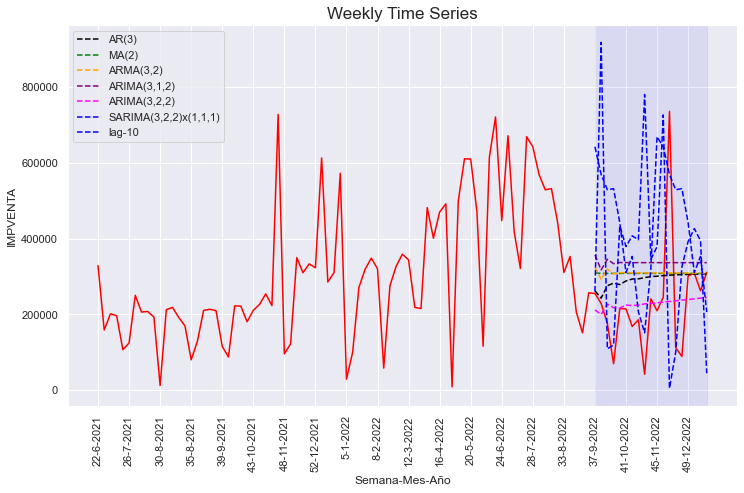

In [282]:
fig, ax = plt.subplots(figsize=(12,7))

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1 , color='red')

p2 = sns.lineplot(data=Time_Series_Simple_Validation_AR_3.Y_test_predictions , color='black', linestyle='--', label='AR(3)')

p3 = sns.lineplot(data=Time_Series_Simple_Validation_MA_2.Y_test_predictions , color='green', linestyle='--', label='MA(2)')

p4 = sns.lineplot(data=Time_Series_Simple_Validation_ARMA_3_2.Y_test_predictions , color='orange', linestyle='--', label='ARMA(3,2)')

p5 = sns.lineplot(data=Time_Series_Simple_Validation_ARIMA_3_1_2.Y_test_predictions , color='purple', linestyle='--', label='ARIMA(3,1,2)')

p6 = sns.lineplot(data=Time_Series_Simple_Validation_ARIMA_3_2_2.Y_test_predictions , color='magenta', linestyle='--', label='ARIMA(3,2,2)')

# p7 = sns.lineplot(data=Time_Series_Simple_Validation_SARIMA_3_1_2_1_1_1.Y_test_predictions , color='blue', linestyle='--', label='SARIMA(3,2,2)x(1,1,1)')

p8 = sns.lineplot(data=df_Time_Series_Simple_Validation_lag_10.iloc[:,0] , color='blue', linestyle='--', label='lag-10')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(80, 98, color='blue', alpha=0.07)

# fig.savefig('p3.jpg', format='jpg', dpi=1200)

plt.show()

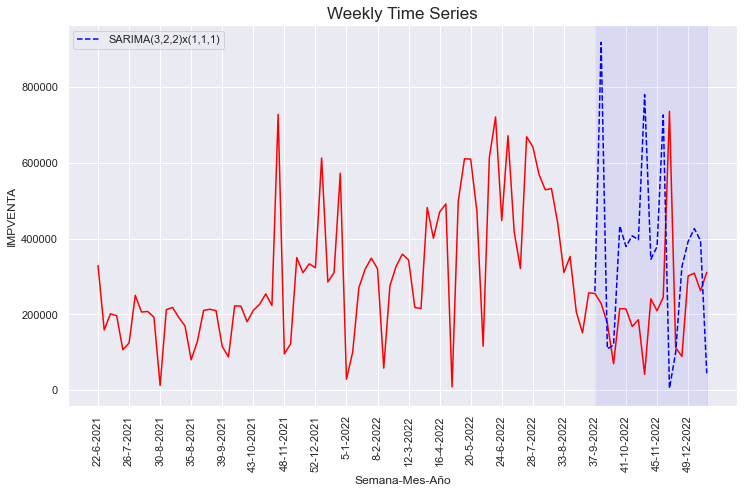

In [284]:
fig, ax = plt.subplots(figsize=(12,7))

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1 , color='red')

p7 = sns.lineplot(data=Time_Series_Simple_Validation_SARIMA_3_1_2_1_1_1.Y_test_predictions , color='blue', linestyle='--', label='SARIMA(3,1,2)x(1,1,1)')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(80, 98, color='blue', alpha=0.07)

# fig.savefig('p3.jpg', format='jpg', dpi=1200)

plt.show()

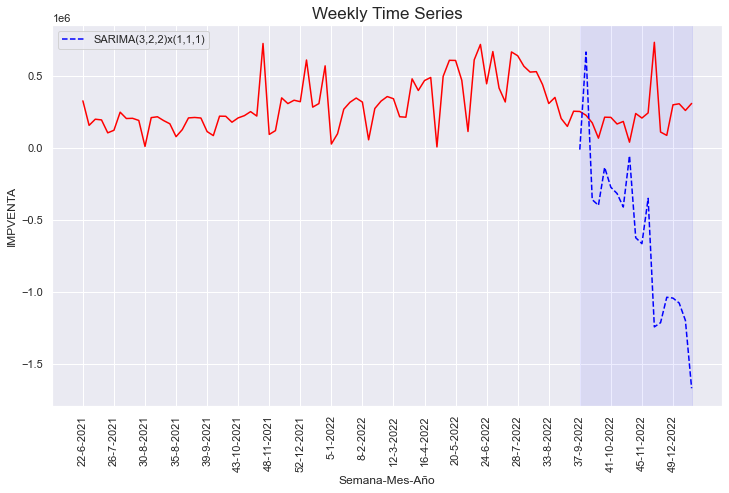

In [287]:
fig, ax = plt.subplots(figsize=(12,7))

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1 , color='red')

p7 = sns.lineplot(data=Time_Series_Simple_Validation_SARIMA_3_2_2_2_2_2.Y_test_predictions , color='blue', linestyle='--', label='SARIMA(3,2,2)x(2,2,2)')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(80, 98, color='blue', alpha=0.07)

# fig.savefig('p3.jpg', format='jpg', dpi=1200)

plt.show()

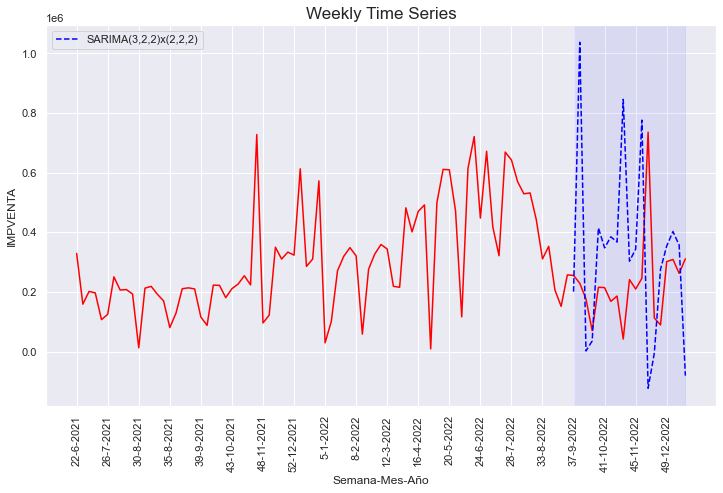

In [290]:
fig, ax = plt.subplots(figsize=(12,7))

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1 , color='red')

p7 = sns.lineplot(data=Time_Series_Simple_Validation_SARIMA_3_2_2_1_1_1.Y_test_predictions , color='blue', linestyle='--', label='SARIMA(3,2,2)x(2,2,2)')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(80, 98, color='blue', alpha=0.07)

# fig.savefig('p3.jpg', format='jpg', dpi=1200)

plt.show()

## Ajuste de hiper-parametros basado en validacion simple:

In [ ]:
def Grid_search(Data, Search_Space, model, validation, random_search, random_seed=None, n_random_samples=None):

   Grid_Search_Metric_list = []

   hyperparameter_combinations = list( itertools.product(Search_Space[0], Search_Space[1]) )

   if random_search == True : 
      
      hyperparameter_combinations = resample(hyperparameter_combinations, n_samples=n_random_samples, replace=False, random_state=random_seed)
   
   else : 
      
      pass


   if model == 'ARIMA' and validation == 'simple validation' :

         for h in hyperparameter_combinations :          

            Time_Series_Simple_Validation_init = Time_Series_Simple_Validation(time_series=Data, prop_train=0.8, model='ARIMA', order=h[0])

            Time_Series_Simple_Validation_init.split_train_test()

            Time_Series_Simple_Validation_init.fit()

            Grid_Search_Metric_list.append( Time_Series_Simple_Validation_init.MAPE )  
            
         ####################################################################################
         
         df = pd.DataFrame({'(order , None)': hyperparameter_combinations, 'MAPE': Grid_Search_Metric_list})

         df = df.sort_values(by='MAPE', ascending=True)

      
   elif model == 'SARIMA' and validation == 'simple validation' :   


         for h in hyperparameter_combinations :
             
            Time_Series_Simple_Validation_init = Time_Series_Simple_Validation(time_series=Data, prop_train=0.8, model='SARIMA', order=h[0], seasonal_order=h[1])

            Time_Series_Simple_Validation_init.split_train_test()

            Time_Series_Simple_Validation_init.fit()

            Grid_Search_Metric_list.append( Time_Series_Simple_Validation_init.MAPE )   
            
         ####################################################################################

         
         df = pd.DataFrame({'(order , seasonal order)': hyperparameter_combinations, 'MAPE': Grid_Search_Metric_list})

         df = df.sort_values(by='MAPE', ascending=True)

      
   return df

In [321]:
order_list = [(p,d,q) for p in range(0,5) for d in range(0,4) for q in range(0,4)]

order_list.pop(0) # eliminamos el primer elemento de la lista (order = (0,0,0) no tiene sentido)

seasonal_order_list = [(P,D,Q) for P in range(0,4) for D in range(0,4) for Q in range(0,4)]

In [323]:
Grid_search(Data=Weekly_Time_Series_1['IMPVENTA'], Search_Space=[order_list, [None]], model='ARIMA', validation='simple validation', random_search=False)

,"(k , distance)",MAPE
19,"((1, 1, 0), None)",54.289647
24,"((1, 2, 1), None)",54.325039
25,"((1, 2, 2), None)",54.555128
3,"((0, 1, 0), None)",54.578102
8,"((0, 2, 1), None)",54.581584
...,...,...
13,"((0, 3, 2), None)",991.883955
29,"((1, 3, 2), None)",1024.413668
30,"((1, 3, 3), None)",1123.974207
27,"((1, 3, 0), None)",1449.243554


In [325]:
order_list = [(p,d,q) for p in range(0,4) for d in range(0,3) for q in range(0,4)]

order_list.pop(0) # eliminamos el primer elemento de la lista (order = (0,0,0) no tiene sentido)

seasonal_order_list = [(P,D,Q) for P in range(0,3) for D in range(0,3) for Q in range(0,3)]

In [326]:
Grid_search(Data=Weekly_Time_Series_1['IMPVENTA'], Search_Space=[order_list, seasonal_order_list], model='ARIMA', validation='simple validation', random_search=False)

,"(k , distance)",MAPE
412,"((1, 1, 0), (0, 2, 1))",54.289647
405,"((1, 1, 0), (0, 0, 0))",54.289647
406,"((1, 1, 0), (0, 0, 1))",54.289647
407,"((1, 1, 0), (0, 0, 2))",54.289647
408,"((1, 1, 0), (0, 1, 0))",54.289647
...,...,...
535,"((1, 2, 0), (2, 1, 1))",586.516768
536,"((1, 2, 0), (2, 1, 2))",586.516768
539,"((1, 2, 0), (2, 2, 2))",586.516768
537,"((1, 2, 0), (2, 2, 0))",586.516768


### Validacion por bloques cortinas

In [17]:
n = len(Weekly_Time_Series_1) - 1

In [18]:
k = 10  # k es el numero de periodos que tendra el bloque de test

In [19]:
import math

In [65]:
train_periods_list = [] ; test_periods_list = []

m = math.floor( (n-k+1)/k ) + 1

for i in range(1, m+1) :

    a1 = 0 ; a2 = i*(k-1) + (i-1)

    b1 = a2 + 1 ; b2 = a2 + k 


    train_periods_list.append(range(a1, a2+1))


    if b2 <= n :

        test_periods_list.append(range(b1, b2+1))

    elif b2 > n : 
        
        test_periods_list.append(range(b1, n+1))


In [66]:
train_periods_list

[range(0, 10),
 range(0, 20),
 range(0, 30),
 range(0, 40),
 range(0, 50),
 range(0, 60),
 range(0, 70),
 range(0, 80),
 range(0, 90)]

In [67]:
test_periods_list

[range(10, 20),
 range(20, 30),
 range(30, 40),
 range(40, 50),
 range(50, 60),
 range(60, 70),
 range(70, 80),
 range(80, 90),
 range(90, 99)]

In [138]:
MAPE_list = []

m = math.floor( (n-k+1)/k ) + 1

for i in range(1, m+1) :

    a1 = 0 ; a2 = i*(k-1) + (i-1)

    b1 = a2 + 1 ; b2 = a2 + k 


    train_periods = range(a1, a2+1)

    if b2 <= n :

        test_periods = range(b1, b2+1)

    elif b2 > n : 
        
        test_periods = range(b1, n+1)


    Y_train = Weekly_Time_Series_1.iloc[train_periods]['Ventas']

    Y_test = Weekly_Time_Series_1.iloc[test_periods]['Ventas']


    arima_model = ARIMA(Y_train, order=(1,0,0))

    arima_model_fit = arima_model.fit()

    Y_test_predictions = arima_model_fit.predict(start=test_periods[0] , end=test_periods[len(test_periods)-1]  , dynamic=False) 

    MAPE_list.append( np.mean(np.abs((Y_test - Y_test_predictions) / Y_test)) * 100 )


MAPE = np.mean(MAPE_list)

In [52]:
MAPE

112.66577657667456

### Visualizacion de los bloques cortinas

### Validacion por bloques moviles

In [131]:
k=10

In [81]:
n = len(Weekly_Time_Series_1) - 1

In [132]:
train_periods_list = [] ; test_periods_list = []

m = n- 2*k

for i in np.arange(0, m+k+1 , k) :

    a1 = i ; a2 = i + k -1

    b1 = a1 + k ; b2 = a2 + k 
    

    train_periods_list.append(range(a1, a2+1))


    if b2 <= n :

        test_periods_list.append(range(b1, b2+1))

    elif b2 > n : 
        
        test_periods_list.append(range(b1, n+1))

In [133]:
train_periods_list

[range(0, 10),
 range(10, 20),
 range(20, 30),
 range(30, 40),
 range(40, 50),
 range(50, 60),
 range(60, 70),
 range(70, 80),
 range(80, 90)]

In [134]:
test_periods_list

[range(10, 20),
 range(20, 30),
 range(30, 40),
 range(40, 50),
 range(50, 60),
 range(60, 70),
 range(70, 80),
 range(80, 90),
 range(90, 99)]

In [152]:
warnings.simplefilter('ignore')

MAPE_list = []

m = n- 2*k

for i in np.arange(0, m+k+1, k) :

    a1 = i ; a2 = i + k -1

    b1 = a1 + k ; b2 = a2 + k 

    
    train_periods = range(a1, a2+1)

    if b2 <= n :

        test_periods = range(b1, b2+1)

    elif b2 > n : 
        
        test_periods = range(b1, n+1)

    Y_train = Weekly_Time_Series_1.iloc[train_periods]['Ventas']

    Y_test = Weekly_Time_Series_1.iloc[test_periods]['Ventas']


    arima_model = ARIMA(Y_train, order=(1,0,0))

    arima_model_fit = arima_model.fit()

    Y_test_predictions = arima_model_fit.predict(start=test_periods[0], end=test_periods[len(test_periods)-1], dynamic=False) 

    MAPE_list.append( np.mean(np.abs((Y_test - Y_test_predictions) / Y_test)) * 100 )


MAPE = np.mean(MAPE_list)

In [153]:
MAPE

123.42058266365572

### Visualizacion de los bloques moviles

### Weekly time series - forecasting with historical mean

In [43]:
Weekly_Time_Series_1

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año
0,2021,6,22,329029.82,22-6-2021
1,2021,6,23,158833.59,23-6-2021
2,2021,6,24,201568.21,24-6-2021
3,2021,6,25,196610.74,25-6-2021
4,2021,6,26,106849.14,26-6-2021
...,...,...,...,...,...
94,2022,12,48,89144.45,48-12-2022
95,2022,12,49,301484.19,49-12-2022
96,2022,12,50,308829.59,50-12-2022
97,2022,12,51,262326.49,51-12-2022


In [44]:
Weekly_Time_Series_1.tail(8)

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año
91,2022,11,46,245475.82,46-11-2022
92,2022,11,47,735813.99,47-11-2022
93,2022,11,48,112353.00,48-11-2022
94,2022,12,48,89144.45,48-12-2022
95,2022,12,49,301484.19,49-12-2022
96,2022,12,50,308829.59,50-12-2022
97,2022,12,51,262326.49,51-12-2022
98,2022,12,52,311029.97,52-12-2022


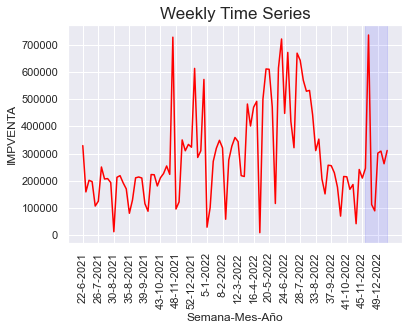

In [45]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(91, 98, color='blue', alpha=0.1) # last eight weeks

# fig.savefig('p3.jpg', format='jpg', dpi=1200)

plt.show()

In [46]:
Weekly_Time_Series_1_test = Weekly_Time_Series_1.tail(8)

In [47]:
Weekly_Time_Series_1_test

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año
91,2022,11,46,245475.82,46-11-2022
92,2022,11,47,735813.99,47-11-2022
93,2022,11,48,112353.00,48-11-2022
94,2022,12,48,89144.45,48-12-2022
95,2022,12,49,301484.19,49-12-2022
96,2022,12,50,308829.59,50-12-2022
97,2022,12,51,262326.49,51-12-2022
98,2022,12,52,311029.97,52-12-2022


In [48]:
Weekly_Time_Series_1_train = Weekly_Time_Series_1.drop( Weekly_Time_Series_1_test.index , axis=0)

In [49]:
Weekly_Time_Series_1_train

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año
0,2021,6,22,329029.82,22-6-2021
1,2021,6,23,158833.59,23-6-2021
2,2021,6,24,201568.21,24-6-2021
3,2021,6,25,196610.74,25-6-2021
4,2021,6,26,106849.14,26-6-2021
...,...,...,...,...,...
86,2022,10,42,168241.63,42-10-2022
87,2022,10,43,186040.66,43-10-2022
88,2022,10,44,41834.72,44-10-2022
89,2022,11,44,241248.48,44-11-2022


In [50]:
Historical_mean_train = Weekly_Time_Series_1_train['IMPVENTA'].mean()

In [51]:
Weekly_Time_Series_1_test.loc[:,'predict_hist_mean'] = Historical_mean_train

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2936\1202782904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weekly_Time_Series_1_test.loc[:,'predict_hist_mean'] = Historical_mean_train


In [52]:
Weekly_Time_Series_1_test

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año,predict_hist_mean
91,2022,11,46,245475.82,46-11-2022,292550.924066
92,2022,11,47,735813.99,47-11-2022,292550.924066
93,2022,11,48,112353.00,48-11-2022,292550.924066
94,2022,12,48,89144.45,48-12-2022,292550.924066
95,2022,12,49,301484.19,49-12-2022,292550.924066
96,2022,12,50,308829.59,50-12-2022,292550.924066
97,2022,12,51,262326.49,51-12-2022,292550.924066
98,2022,12,52,311029.97,52-12-2022,292550.924066


In [53]:
def mape(y_true, y_pred):
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [54]:
mape_hist_mean = mape(Weekly_Time_Series_1_test['IMPVENTA'], Weekly_Time_Series_1_test['predict_hist_mean'])

mape_hist_mean

61.70964279179175

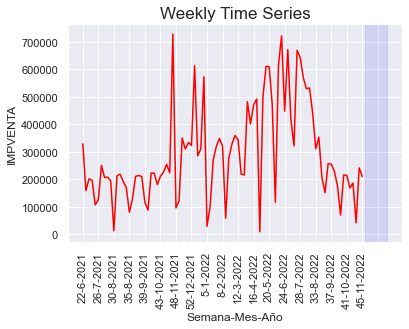

In [55]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_train , color='red')

p.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(91, 98, color='blue', alpha=0.1) # last eight weeks

# fig.savefig('p3.jpg', format='jpg', dpi=1200)


In [56]:
Weekly_Time_Series_1_train

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año
0,2021,6,22,329029.82,22-6-2021
1,2021,6,23,158833.59,23-6-2021
2,2021,6,24,201568.21,24-6-2021
3,2021,6,25,196610.74,25-6-2021
4,2021,6,26,106849.14,26-6-2021
...,...,...,...,...,...
86,2022,10,42,168241.63,42-10-2022
87,2022,10,43,186040.66,43-10-2022
88,2022,10,44,41834.72,44-10-2022
89,2022,11,44,241248.48,44-11-2022


In [57]:
Weekly_Time_Series_1_test

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año,predict_hist_mean
91,2022,11,46,245475.82,46-11-2022,292550.924066
92,2022,11,47,735813.99,47-11-2022,292550.924066
93,2022,11,48,112353.00,48-11-2022,292550.924066
94,2022,12,48,89144.45,48-12-2022,292550.924066
95,2022,12,49,301484.19,49-12-2022,292550.924066
96,2022,12,50,308829.59,50-12-2022,292550.924066
97,2022,12,51,262326.49,51-12-2022,292550.924066
98,2022,12,52,311029.97,52-12-2022,292550.924066


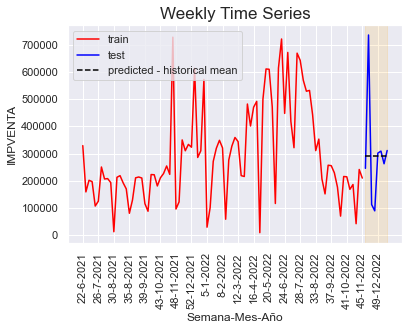

In [58]:
fig, ax = plt.subplots()

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_train , color='red', label='train')

p2 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_test , color='blue', label='test')

p3 = sns.lineplot(x="Semana-Mes-Año", y="predict_hist_mean", data=Weekly_Time_Series_1_test , color='black', linestyle='--', label='predicted - historical mean')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(91, 98, color='orange', alpha=0.13) # last eight weeks

fig.savefig('p8.jpg', format='jpg', dpi=1200)


### Weekly Time Series - Predicting with last k periods mean

In [59]:
k=6

In [60]:
last_k_periods_mean_train = Weekly_Time_Series_1_train.tail(k)['IMPVENTA'].mean()

In [61]:
Weekly_Time_Series_1_test.loc[: , 'last_k_periods_mean_train'] = last_k_periods_mean_train

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2936\3960696509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weekly_Time_Series_1_test.loc[: , 'last_k_periods_mean_train'] = last_k_periods_mean_train


In [62]:
Weekly_Time_Series_1_test

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año,predict_hist_mean,last_k_periods_mean_train
91,2022,11,46,245475.82,46-11-2022,292550.924066,176893.885
92,2022,11,47,735813.99,47-11-2022,292550.924066,176893.885
93,2022,11,48,112353.00,48-11-2022,292550.924066,176893.885
94,2022,12,48,89144.45,48-12-2022,292550.924066,176893.885
95,2022,12,49,301484.19,49-12-2022,292550.924066,176893.885
96,2022,12,50,308829.59,50-12-2022,292550.924066,176893.885
97,2022,12,51,262326.49,51-12-2022,292550.924066,176893.885
98,2022,12,52,311029.97,52-12-2022,292550.924066,176893.885


In [63]:
mape_last_k_periods_mean = mape(Weekly_Time_Series_1_test['IMPVENTA'], Weekly_Time_Series_1_test['last_k_periods_mean_train'])

mape_last_k_periods_mean

52.43977367176916

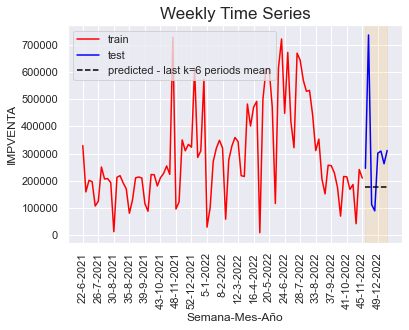

In [64]:
fig, ax = plt.subplots()

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_train , color='red', label='train')

p2 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_test , color='blue', label='test')

p3 = sns.lineplot(x="Semana-Mes-Año", y="last_k_periods_mean_train", data=Weekly_Time_Series_1_test , color='black', linestyle='--', label='predicted - last k=6 periods mean')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(91, 98, color='orange', alpha=0.13) # last eight weeks

fig.savefig('p9.jpg', format='jpg', dpi=1200)


### Weekly Time Series - Predicting with last k periods median

In [65]:
k=6

last_k_periods_median_train = Weekly_Time_Series_1_train.tail(k)['IMPVENTA'].median()

Weekly_Time_Series_1_test.loc[: , 'last_k_periods_median_train'] = last_k_periods_median_train


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2936\1741488365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weekly_Time_Series_1_test.loc[: , 'last_k_periods_median_train'] = last_k_periods_median_train


In [66]:
mape_last_k_periods_median = mape(Weekly_Time_Series_1_test['IMPVENTA'], Weekly_Time_Series_1_test['last_k_periods_mean_train'])
mape_last_k_periods_median

52.43977367176916

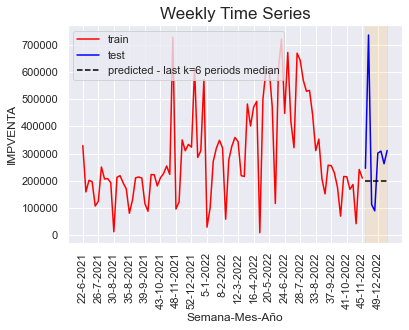

In [67]:
fig, ax = plt.subplots()

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_train , color='red', label='train')

p2 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_test , color='blue', label='test')

p3 = sns.lineplot(x="Semana-Mes-Año", y="last_k_periods_median_train", data=Weekly_Time_Series_1_test , color='black', linestyle='--', label='predicted - last k=6 periods median')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(91, 98, color='orange', alpha=0.13) # last eight weeks

fig.savefig('p10.jpg', format='jpg', dpi=1200)


### Forecasting with last k periods train time serie

In [68]:
k=len(Weekly_Time_Series_1_test)

In [69]:
last_k_periods_train_time_series = Weekly_Time_Series_1_train['IMPVENTA'].tail(k)

In [70]:
last_k_periods_train_time_series.name = 'last_k_periods_train_time_series'

In [71]:
# necesario para concatenar por columns Weekly_Time_Series_1_test y last_k_periods_train_time_series, y que se mantenga el indice de Weekly_Time_Series_1_test
last_k_periods_train_time_series.index = Weekly_Time_Series_1_test.index

In [72]:
pd.concat([Weekly_Time_Series_1_test, last_k_periods_train_time_series], axis=1)

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año,predict_hist_mean,last_k_periods_mean_train,last_k_periods_median_train,last_k_periods_train_time_series
91,2022,11,46,245475.82,46-11-2022,292550.924066,176893.885,197830.49,69790.87
92,2022,11,47,735813.99,47-11-2022,292550.924066,176893.885,197830.49,215449.91
93,2022,11,48,112353.00,48-11-2022,292550.924066,176893.885,197830.49,214377.50
94,2022,12,48,89144.45,48-12-2022,292550.924066,176893.885,197830.49,168241.63
95,2022,12,49,301484.19,49-12-2022,292550.924066,176893.885,197830.49,186040.66
96,2022,12,50,308829.59,50-12-2022,292550.924066,176893.885,197830.49,41834.72
97,2022,12,51,262326.49,51-12-2022,292550.924066,176893.885,197830.49,241248.48
98,2022,12,52,311029.97,52-12-2022,292550.924066,176893.885,197830.49,209620.32


In [73]:
Weekly_Time_Series_1_test = pd.concat([Weekly_Time_Series_1_test, last_k_periods_train_time_series], axis=1)

In [74]:
Weekly_Time_Series_1_test

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año,predict_hist_mean,last_k_periods_mean_train,last_k_periods_median_train,last_k_periods_train_time_series
91,2022,11,46,245475.82,46-11-2022,292550.924066,176893.885,197830.49,69790.87
92,2022,11,47,735813.99,47-11-2022,292550.924066,176893.885,197830.49,215449.91
93,2022,11,48,112353.00,48-11-2022,292550.924066,176893.885,197830.49,214377.50
94,2022,12,48,89144.45,48-12-2022,292550.924066,176893.885,197830.49,168241.63
95,2022,12,49,301484.19,49-12-2022,292550.924066,176893.885,197830.49,186040.66
96,2022,12,50,308829.59,50-12-2022,292550.924066,176893.885,197830.49,41834.72
97,2022,12,51,262326.49,51-12-2022,292550.924066,176893.885,197830.49,241248.48
98,2022,12,52,311029.97,52-12-2022,292550.924066,176893.885,197830.49,209620.32


In [75]:
mape_last_k_periods_train_time_series = mape(Weekly_Time_Series_1_test['IMPVENTA'], Weekly_Time_Series_1_test['last_k_periods_train_time_series'])

mape_last_k_periods_train_time_series

60.901249793430644

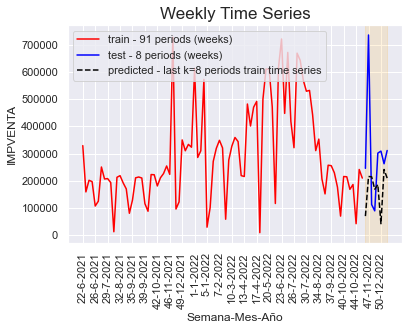

In [76]:
fig, ax = plt.subplots()

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_train , color='red', label='train - 91 periods (weeks)')

p2 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_test , color='blue', label='test - 8 periods (weeks)')

p3 = sns.lineplot(x="Semana-Mes-Año", y="last_k_periods_train_time_series", data=Weekly_Time_Series_1_test , color='black', linestyle='--', label='predicted - last k=8 periods train time series')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 4))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(91, 98, color='orange', alpha=0.13) # last eight weeks

fig.savefig('p11.jpg', format='jpg', dpi=1200)

## Forecasting the future

In [77]:
Time_Series_1_Future_Predictions = pd.DataFrame(index=range(99, 99+200)) 

In [78]:
# Crea una lista con la fecha
initial_date = ['2022-12-31']

# Convierte la lista en una serie de fechas
initial_date = pd.to_datetime(initial_date)

# Obtén las 200 fechas siguientes
next_dates = [ initial_date[0] + pd.Timedelta(days=i)  for i in range(1, 1+200) ]

# Convierte las fechas siguientes en una serie
next_dates = pd.to_datetime(next_dates)

In [79]:
Time_Series_1_Future_Predictions['Fecha'] = next_dates

In [80]:
Time_Series_1_Future_Predictions['Fecha'] = pd.to_datetime(Time_Series_1_Future_Predictions['Fecha'])

Time_Series_1_Future_Predictions['Dia'] = Time_Series_1_Future_Predictions['Fecha'].dt.day

Time_Series_1_Future_Predictions['Semana'] = Time_Series_1_Future_Predictions['Fecha'].dt.week

Time_Series_1_Future_Predictions['Mes'] = Time_Series_1_Future_Predictions['Fecha'].dt.month

Time_Series_1_Future_Predictions['Trimestre'] = Time_Series_1_Future_Predictions['Fecha'].dt.quarter

Time_Series_1_Future_Predictions['Año'] = Time_Series_1_Future_Predictions['Fecha'].dt.year

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2936\1790077679.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Time_Series_1_Future_Predictions['Semana'] = Time_Series_1_Future_Predictions['Fecha'].dt.week


In [81]:
Time_Series_1_Future_Predictions

,Fecha,Dia,Semana,Mes,Trimestre,Año
99,2023-01-01,1,52,1,1,2023
100,2023-01-02,2,1,1,1,2023
101,2023-01-03,3,1,1,1,2023
102,2023-01-04,4,1,1,1,2023
103,2023-01-05,5,1,1,1,2023
...,...,...,...,...,...,...
294,2023-07-15,15,28,7,3,2023
295,2023-07-16,16,28,7,3,2023
296,2023-07-17,17,29,7,3,2023
297,2023-07-18,18,29,7,3,2023


### Weekly time series - forecasting with historical mean

In [82]:
Time_Series_1_Future_Predictions['IMPVENTA'] = np.nan

In [83]:
Time_Series_1_Future_Predictions

,Fecha,Dia,Semana,Mes,Trimestre,Año,IMPVENTA
99,2023-01-01,1,52,1,1,2023,NaN
100,2023-01-02,2,1,1,1,2023,NaN
101,2023-01-03,3,1,1,1,2023,NaN
102,2023-01-04,4,1,1,1,2023,NaN
103,2023-01-05,5,1,1,1,2023,NaN
...,...,...,...,...,...,...,...
294,2023-07-15,15,28,7,3,2023,NaN
295,2023-07-16,16,28,7,3,2023,NaN
296,2023-07-17,17,29,7,3,2023,NaN
297,2023-07-18,18,29,7,3,2023,NaN


In [84]:
Weekly_Time_Series_1_Future_Predictions =  Time_Series_1_Future_Predictions.groupby(['Año', 'Mes','Semana'])['IMPVENTA'].sum().reset_index()

In [85]:
Weekly_Time_Series_1_Future_Predictions['IMPVENTA'] = np.nan

In [86]:
Historical_mean = Weekly_Time_Series_1['IMPVENTA'].mean()

In [87]:
Weekly_Time_Series_1_Future_Predictions['predict_hist_mean'] = Historical_mean

In [88]:
Weekly_Time_Series_1_Future_Predictions['Año'] = Weekly_Time_Series_1_Future_Predictions['Año'].astype('string')
Weekly_Time_Series_1_Future_Predictions['Mes'] = Weekly_Time_Series_1_Future_Predictions['Mes'].astype('string')
Weekly_Time_Series_1_Future_Predictions['Semana'] = Weekly_Time_Series_1_Future_Predictions['Semana'].astype('string')

In [89]:
Weekly_Time_Series_1_Future_Predictions['Semana-Mes-Año'] = Weekly_Time_Series_1_Future_Predictions[['Semana', 'Mes', 'Año']].agg('-'.join, axis=1)

In [90]:
Weekly_Time_Series_1_Future_Predictions

,Año,Mes,Semana,IMPVENTA,predict_hist_mean,Semana-Mes-Año
0,2023,1,1,NaN,292814.056465,1-1-2023
1,2023,1,2,NaN,292814.056465,2-1-2023
2,2023,1,3,NaN,292814.056465,3-1-2023
3,2023,1,4,NaN,292814.056465,4-1-2023
4,2023,1,5,NaN,292814.056465,5-1-2023
5,2023,1,52,NaN,292814.056465,52-1-2023
6,2023,2,5,NaN,292814.056465,5-2-2023
7,2023,2,6,NaN,292814.056465,6-2-2023
8,2023,2,7,NaN,292814.056465,7-2-2023
9,2023,2,8,NaN,292814.056465,8-2-2023


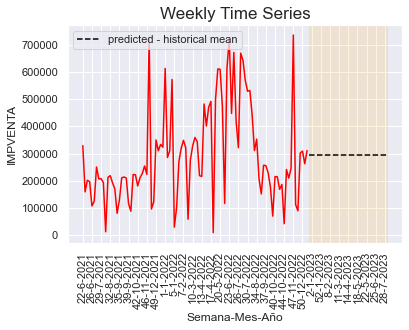

In [91]:
fig, ax = plt.subplots()

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1 , color='red')

p2 = sns.lineplot(x="Semana-Mes-Año", y="predict_hist_mean", data=Weekly_Time_Series_1_Future_Predictions , color='black', linestyle='--', label='predicted - historical mean')

p1.set_xticks(np.arange(0 , 99+34, 4))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(99, 99+34, color='orange', alpha=0.13) # last eight weeks

fig.savefig('p9.jpg', format='jpg', dpi=1200)
